In [6]:
import numpy as np
from matplotlib import pyplot as plt


def process_img_for_plot(img):
    # log处理
    imgScale = np.log10(img + 1e-30)
    # 获取实际的值
    imgValid = imgScale[img != 0]
    # 使图像分布在0-255
    p10 = np.percentile(imgValid, 10)
    m = 255 / (imgValid.max() - p10)
    b = -p10 * m
    # 去除最小值
    img = imgScale * m + b
    img[img < 0] = 0
    return img


# S_01224201    S_00170101  S_03280801  S_03289201 S_07639501   S_00183004 S_07639501 S_01389101
# S_01716901 NPLD
# S_02570502 Utopia
# S_01389101 Utopia
PRODUCT_ID = "S_01389101"
result_path = 'data/result/' + PRODUCT_ID + '/'

Text(80, 680, '100Km')

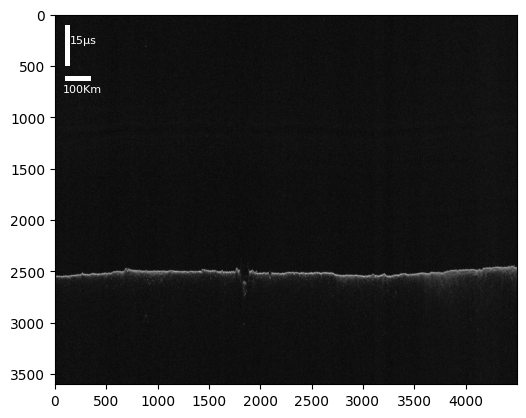

In [7]:
import matplotlib.patches as patches

sim_area_cartesian = np.load(result_path + 'sim_area_cartesian.npy')
point_count = sim_area_cartesian.shape[0]
rgram = np.load(result_path + 'rgram_data.npy')
rgram_vv = np.load(result_path + 'rgram_vv.npy')
radius = sim_area_cartesian.reshape(point_count * 3001 * 3, 3)
radius = np.linalg.norm(radius, axis=1) - 3396190
radius = radius.reshape(point_count, 3001, 3)
# 使用transpose将3001和3的维度交换位置
transposed_radius = radius.transpose(0, 2, 1)

# 使用reshape变为(point_count * 3) x 3001的形状
reshaped_radius = transposed_radius.reshape(point_count * 3, 3001)

plt.imshow(process_img_for_plot(rgram), cmap='gray')
# plt.axis('off')

# y轴方向上的相邻两个点之间的距离为0.0375微秒，沿y轴画一个条状表示15微秒的长度
y_scale = patches.Rectangle((100, 100), 50, 15 / 0.0375, linewidth=1, edgecolor='none', facecolor='w')
plt.gca().add_patch(y_scale)
plt.text(150, 200, '15μs', fontsize=8, verticalalignment='top', horizontalalignment='left', color='w')
# x轴方向上的相邻两个点之间的距离为400m，沿x轴画一个条状表示100Km的长度
x_scale = patches.Rectangle((100, 600), 100000 / 400, 50, linewidth=1, edgecolor='none', facecolor='w')
plt.gca().add_patch(x_scale)
plt.text(80, 680, '100Km', fontsize=8, verticalalignment='top', horizontalalignment='left', color='w')


# plt.savefig('data/img/' + PRODUCT_ID + '_1.png', dpi=1000, bbox_inches='tight')

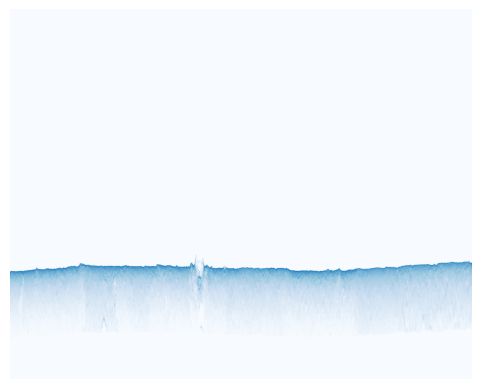

In [8]:
plt.imshow(process_img_for_plot(rgram_vv), cmap='Blues')
plt.axis('off')
plt.savefig('data/img/' + PRODUCT_ID + '_2.png', dpi=1000, bbox_inches='tight')

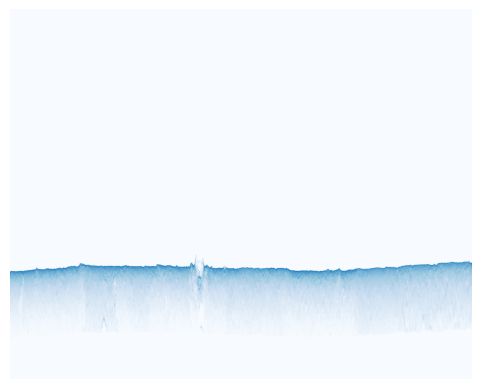

In [9]:
rgram_hh = np.load(result_path + 'rgram_hh.npy')
plt.imshow(process_img_for_plot(rgram_hh), cmap='Blues')
plt.axis('off')
plt.savefig('data/img/' + PRODUCT_ID + '_2_2.png', dpi=1000, bbox_inches='tight')

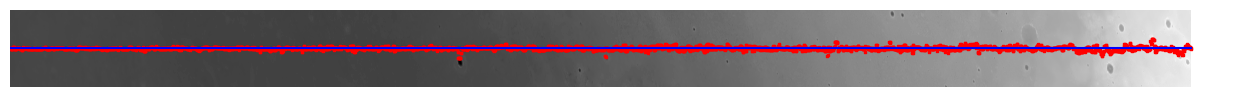

In [5]:
delay = np.load(result_path + 'delay.npy')
temp = delay.reshape(point_count, 3000, 4)
# 找到每个delay[i,:,:]中最小值的索引
# 在3000的方向上找到最小值的索引
min_indices = np.argmin(temp.reshape(point_count, -1), axis=1)
plt.figure(figsize=(16, 9))
plt.imshow(reshaped_radius.T, cmap='gray')
x = np.linspace(0, reshaped_radius.shape[0], point_count)
y = np.round(min_indices / 4)
# marker的形状可以参考 https://matplotlib.org/3.1.1/api/markers_api.html
plt.scatter(x, y, marker=',', s=1, c='r')
# 画一条中线
plt.plot([0, reshaped_radius.shape[0]], [reshaped_radius.shape[1] / 2, reshaped_radius.shape[1] / 2], c='b')
# 调整y轴缩放
plt.gca().set_aspect(0.3)
plt.axis('off')
# x轴只显示2000-4000
# plt.xlim(6000, 12000)
plt.savefig('data/img/' + PRODUCT_ID + '_3.png', dpi=300, bbox_inches='tight')

In [51]:
reshaped_radius.T.shape

(3001, 8211)

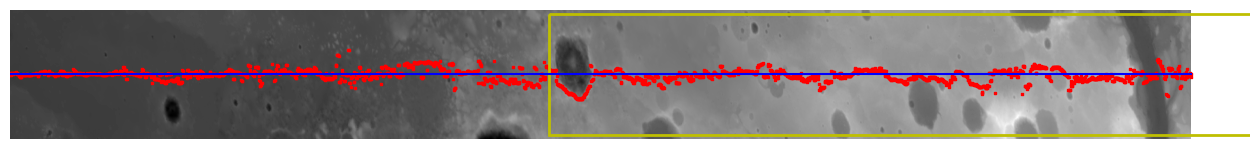

In [52]:
delay = np.load(result_path + 'delay.npy')
temp = delay.reshape(point_count, 3000, 4)
# 找到每个delay[i,:,:]中最小值的索引
# 在3000的方向上找到最小值的索引
min_indices = np.argmin(temp.reshape(point_count, -1), axis=1)
plt.figure(figsize=(16, 9))
plt.imshow(reshaped_radius.T, cmap='gray')
x = np.linspace(0, reshaped_radius.shape[0], point_count)
y = np.round(min_indices / 4)
# marker的形状可以参考 https://matplotlib.org/3.1.1/api/markers_api.html
plt.scatter(x, y, marker=',', s=1, c='r')
# 画一条中线
plt.plot([0, reshaped_radius.shape[0]], [reshaped_radius.shape[1] / 2, reshaped_radius.shape[1] / 2], c='b')
# 调整y轴缩放
plt.gca().set_aspect(0.3)
plt.axis('off')
# 加一个黄色的方框
plt.gca().add_patch(patches.Rectangle((3750,100),5250,2800, linewidth=2, edgecolor='y', facecolor='none'))
# x轴只显示2000-4000
# plt.xlim(6000, 12000)
plt.savefig('data/img/' + PRODUCT_ID + '_3.png', dpi=300, bbox_inches='tight')

In [53]:
# plt.imshow(process_img_for_plot(rgram), cmap='gray')
# plt.axis('off')
# 
# # y轴方向上的相邻两个点之间的距离为0.0375微秒，沿y轴画一个条状表示15微秒的长度
# y_scale = patches.Rectangle((100, 100), 50, 15 / 0.0375, linewidth=1, edgecolor='none', facecolor='w')
# plt.gca().add_patch(y_scale)
# plt.text(150, 200, '15μs', fontsize=8, verticalalignment='top', horizontalalignment='left', color='w')
# # x轴方向上的相邻两个点之间的距离为400m，沿x轴画一个条状表示100Km的长度
# x_scale = patches.Rectangle((100, 600), 100000 / 400, 50, linewidth=1, edgecolor='none', facecolor='w')
# plt.gca().add_patch(x_scale)
# plt.text(80, 680, '100Km', fontsize=8, verticalalignment='top', horizontalalignment='left', color='w')
# # 加一个黄色的方框
# plt.gca().add_patch(patches.Rectangle((1250,100),1750,3400, linewidth=2, edgecolor='y', facecolor='none'))
# 
# plt.savefig('data/img/' + PRODUCT_ID + '_1.png', dpi=300, bbox_inches='tight')

In [54]:
# plt.imshow(process_img_for_plot(rgram_vv), cmap='Blues')
# plt.axis('off')
# # 加一个黄色的方框
# plt.gca().add_patch(patches.Rectangle((1250,100),1750,3400, linewidth=2, edgecolor='y', facecolor='none'))
# # save
# plt.savefig('data/img/' + PRODUCT_ID + '_2.png', dpi=300, bbox_inches='tight')

In [55]:
# from method.mola.mola import plot_mola
# geom = np.load(result_path + 'geom_data.npy',allow_pickle=True)
# # 第三列geom是纬度，第四列是经度
# lon = geom[:, 3]
# lat = geom[:, 2]
# # polygons = {
# #         "polygons": [[(1.5, 1.5), (-1.5, 1.5), (-1.5, -1.5), (1.5, -1.5)]],
# #         "color": ["green"],
# #     }
# # lon lat 组成polygons的形式,即[(lon1,lat1),(lon2,lat2),...]
# lines = {
#     "lines": [[(lon[i], lat[i]) for i in range(len(lon))]],
#     "color": ["green"],
# }
# 
# lon_range = [lon.min()-10, lon.max()+10]
# lat_range = [lat.min()-10, lat.max()+10]
# plot_mola(lon_range=lon_range, lat_range=lat_range, lines=lines)

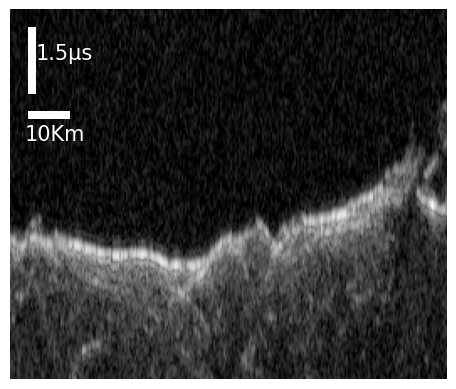

In [113]:
plt.imshow(process_img_for_plot(rgram[2200:2420,1490:1750]), cmap='gray')
plt.axis('off')

# # y轴方向上的相邻两个点之间的距离为0.0375微秒，沿y轴画一个条状表示1.5微秒的长度
y_scale = patches.Rectangle((10, 10), 5, 1.5 / 0.0375, linewidth=1, edgecolor='none', facecolor='w')
plt.gca().add_patch(y_scale)
plt.text(15, 20, '1.5μs', fontsize=15, verticalalignment='top', horizontalalignment='left', color='w')
# # x轴方向上的相邻两个点之间的距离为400m，沿x轴画一个条状表示10Km的长度
x_scale = patches.Rectangle((10, 60), 10000 / 400, 5, linewidth=1, edgecolor='none', facecolor='w')
plt.gca().add_patch(x_scale)
plt.text(8, 68, '10Km', fontsize=15, verticalalignment='top', horizontalalignment='left', color='w')


plt.savefig('data/img/' + PRODUCT_ID + '_1.png', dpi=1000, bbox_inches='tight')

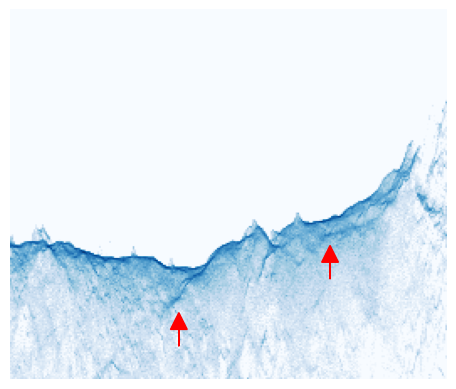

In [112]:
plt.imshow(process_img_for_plot(rgram_vv[2200:2420,1490:1750]), cmap='Blues')
plt.axis('off')

# 加箭头
plt.arrow(100, 200, 0, -10, head_width=10, head_length=10, fc='r', ec='r')
plt.arrow(190, 160, 0, -10, head_width=10, head_length=10, fc='r', ec='r')

# # save
plt.savefig('data/img/' + PRODUCT_ID + '_2.png', dpi=1000, bbox_inches='tight')